# Telco Churn Report

## Project Goal

- Identify Key Churn Drivers: Determine the primary factors influencing customer churn at Telco by conducting a thorough analysis of customer data.
- Develop Predictive Models: Build accurate machine learning models that predict customer churn based on historical data.
- Provide Actionable Insights: Translate complex data analysis into actionable insights and recommendations for Telco.
- Long-Term Churn Prevention: Extend the project's impact beyond immediate insights by creating a roadmap for ongoing churn prevention.

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wrangle import train_val_test
from sklearn.preprocessing import MinMaxScaler
from prepare import get_telco_data, encode_columns
from sklearn.neighbors import KNeighborsClassifier
from explore import perform_chi_squared_test, perform_t_test, create_churn_plots, create_tech_support_churn_plot, create_tenure_churn_boxplot, create_contract_type_churn_plot, create_internet_service_churn_plot

from modeling import x_y_split, train_decision_tree, train_random_forest, train_knn, train_logistic_regression, test_knn, generate_knn_predictions, generate_knn_predictions

## Acquire

- Acquiring specific columns that i need for the project from the telco_churn dataset using sql.
- Read the sql query into a dataframe.
- It contained 7_043 rows and 24 columns before cleaning

## Prepare data

* Create new columns by transforming and utilizing existing data features.
    - Drop the customer_id column
    - Check all rows in the df with no/null values and replacing them with an appropriate value.
    - Group different values in the columns and make them categorical if needed.
    - One-hot encode categorical culomns with get dummies.
    - Drop all the encoded columns that are not useful.

## Data Dictionary

| Feature                | Definition | Data Type |
|:-----------------------|:-----------|:----------|
| customer_id            | customers unique identification number | Object |
| gender                 | Gender of the customer | Object |
| senior_citizen         | 0 if not a senior citizen, 1 if a senior citizen | Integer |
| partner                | Whether the customer has a partner (Yes/No) | Object |
| dependents             | Whether the customer has dependents (Yes/No) | Object |
| tenure                 | Number of months the customer has been with the company | Integer |
| phone_service          | Whether the customer has phone service (Yes/No) | Object |
| multiple_lines         | Whether the customer has multiple lines (Yes/No) | Object |
| online_security        | Whether the customer has online security (Yes/No) | Object |
| online_backup          | Whether the customer has online backup (Yes/No) | Object |
| device_protection      | Whether the customer has device protection (Yes/No) | Object |
| tech_support           | Whether the customer has tech support (Yes/No) | Object |
| streaming_tv           | Whether the customer has streaming TV (Yes/No) | Object |
| streaming_movies       | Whether the customer has streaming movies (Yes/No) | Object |
| paperless_billing      | Whether the customer has paperless billing (Yes/No) | Object |
| monthly_charges        | Monthly charges for the customer | Float |
| total_charges          | Total charges incurred by the customer | Object |
| churn                  | Whether the customer has churned (Yes/No) | Object |
| payment_type           | Method of payment for the service | Object |
| contract_type          | Type of contract (e.g., Month-to-Month, One/Two Years) | Object |
| internet_service_type  | Type of internet service (e.g., DSL, Fiber optic) | Object |


In [32]:
# acquiring, cleaning, and adding features to data
telco_df = get_telco_data()

# splitting data into train, validate, and test
train, val, test = train_val_test(telco_df, strat = 'churn')

### A quick overview of the data

In [33]:
#using .head() to take a quick look at the train data.
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
5609,7901-HXJVA,Male,0,No,No,14,Yes,No,No,No,...,No,No,No,No,76.45,1117,False,Manual Payment,Month-to-month,Fiber optic
2209,3164-AALRN,Male,0,No,No,5,Yes,No,No,No,...,No,Yes,Yes,Yes,70.00,347,True,Manual Payment,one/two-years,DSL
6919,9821-POOTN,Male,0,Yes,No,35,Yes,Yes,No,No,...,No,No,No,Yes,75.20,2576,True,Manual Payment,Month-to-month,Fiber optic
2284,3259-QMXUN,Male,0,Yes,No,58,Yes,Yes,Yes,Yes,...,No,Yes,Yes,Yes,86.10,4890,False,Manual Payment,one/two-years,DSL
845,1226-UDFZR,Female,0,No,No,2,Yes,No,No,Yes,...,No,No,No,Yes,49.60,114,True,Manual Payment,Month-to-month,DSL


### A concise summary of the data

In [34]:
#using.info() to check all the data types and null values

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4930 entries, 5609 to 5679
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            4930 non-null   object 
 1   gender                 4930 non-null   object 
 2   senior_citizen         4930 non-null   int64  
 3   partner                4930 non-null   object 
 4   dependents             4930 non-null   object 
 5   tenure                 4930 non-null   int64  
 6   phone_service          4930 non-null   object 
 7   multiple_lines         4930 non-null   object 
 8   online_security        4930 non-null   object 
 9   online_backup          4930 non-null   object 
 10  device_protection      4930 non-null   object 
 11  tech_support           4930 non-null   object 
 12  streaming_tv           4930 non-null   object 
 13  streaming_movies       4930 non-null   object 
 14  paperless_billing      4930 non-null   object 
 15  monthl

## Explore

## Chi^2 test

#### Does having tech support affects churn?

Null hypothesis: Having tech support DOES NOT affect churn.

Alternative hypothesis: Having tech support AFFECTS churn.

I will now use a chi-square test to investigate whether having tech support affects churn

I will use a confidence interval of 95%  
The resulting alpha is .05

In [35]:
#using the perform_chi_squared_test function to find the value of p

perform_chi_squared_test(train, 'churn', 'tech_support', alpha = 0.05)

('we reject the null hypothesis. There appears to be a relationship',
 4.700462998703674e-128)

#### Takeaway

- The chi^2 test produced a p-value of (4.700462998703674e-128) which is significantly lower than our cutoff alpha value of 0.05 indicating that there is a strong correlation between having tech support and churn.

#### Creating a countplot to visualize the relationship between tech support and churn

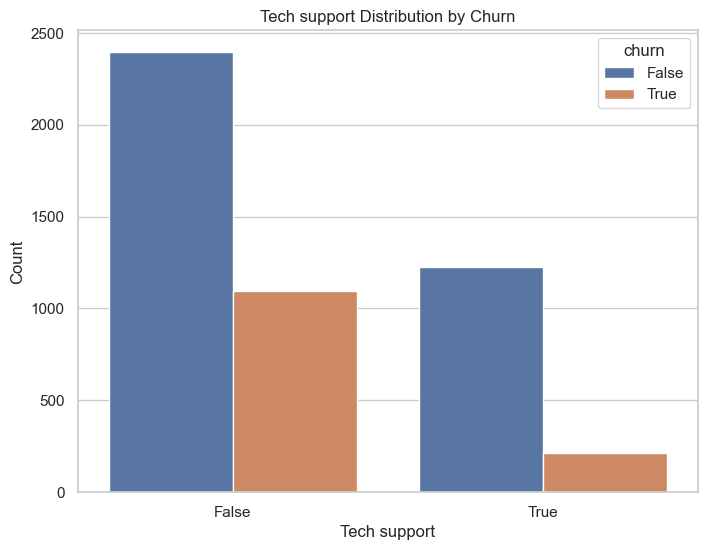

In [51]:
# Create a countplot using Seaborn to visualize the distribution of 'tech_support' by 'churn'
# This function generates a countplot to show the distribution of 'tech_support' by 'churn' in the 'train' dataset.
create_tech_support_churn_plot(train)

#### takeaway from countplot

- We can observe that the presence of tech support does impact churn, as nearly half of customers without tech support have churned, in contrast to the fewer than 15% of customers with tech support who have churned.

## Independent t-test

#### Does tenure have a direct relationship with churn?


Null hypothesis: Tenure DOES NOT have a direct relationship with churn.

Alternative hypothesis: Tenure has a direct relationship with churn.

In [37]:
# Perform a t-test on the 'tenure' column of the training data
perform_t_test(train, 'tenure')

('Reject the null hypothesis: tenure has a significant effect on churn.',
 1.6523707947511127e-170)

#### Takeaway

The independent t-test produced a p value of (1.6523707947511127e-170) which is significantly lower than our cutoff of 0.05 indicating that there is a direct relationship between tenure and the churn.

#### Creating a boxplot to visualize the relationship between tenure and churn

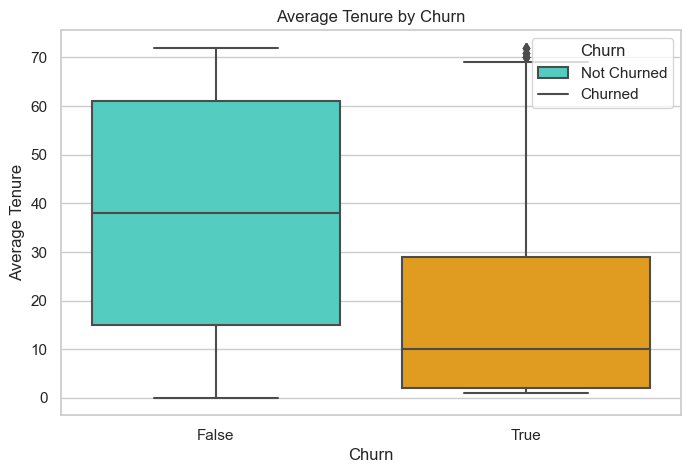

In [52]:
# Create a boxplot using Seaborn to visualize the distribution of 'tenure' by 'churn'
# This function generates a boxplot to illustrate the distribution of 'tenure' by 'churn' in the 'train' dataset.
create_tenure_churn_boxplot(train)

#### takeaway from boxplot

The above bar plot shows the average tenure for both churn groups and we can discern that the longer the customer is with the company the less likely it is for them to churn.

## Chi^2 test

#### Does the contract type affect churn?

Null hypothesis : Contract type has NO relation to churn.

Alternative hypothesis : Contract type HAS a relation to churn.

In [39]:
# Perform a chi-squared test of independence on 'churn' and 'contract_type' columns in the training data
perform_chi_squared_test(train, 'churn', 'contract_type')

('we reject the null hypothesis. There appears to be a relationship',
 1.8766652889790652e-184)

### Takeaway

- - The chi^2 test produced a p value of ( 1.8766652889790652e-184) which is significantly lower than our cutoff of 0.05 indicating that there is a strong correlation between contract type and churn.

#### Creating a countplot to visualize the relationship between contract type and churn

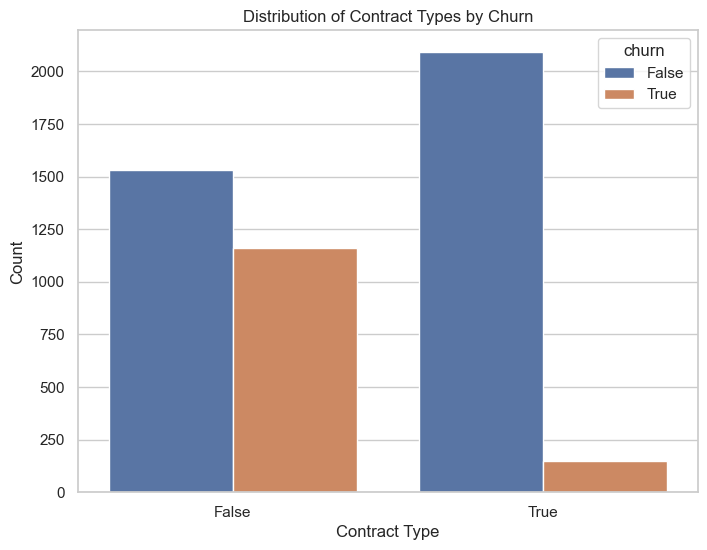

In [53]:
# Create a countplot using Seaborn to visualize the distribution of 'contract_type' by 'churn'
# Comment: This function generates a countplot to depict the distribution of 'contract_type' by 'churn' in the 'train' dataset.
create_contract_type_churn_plot(train)

#### Takeaway from boxplot

- We can observe that the presence of tech support does impact churn, as nearly half of customers without tech support have churned, in contrast to the fewer than 15% of customers with tech support who have churned.

- We can discern from the box plot that having a month to month contract significantly increases the probability of the customer churning.

### Countplot

#### Does internet service type have a strong relationship with churn?

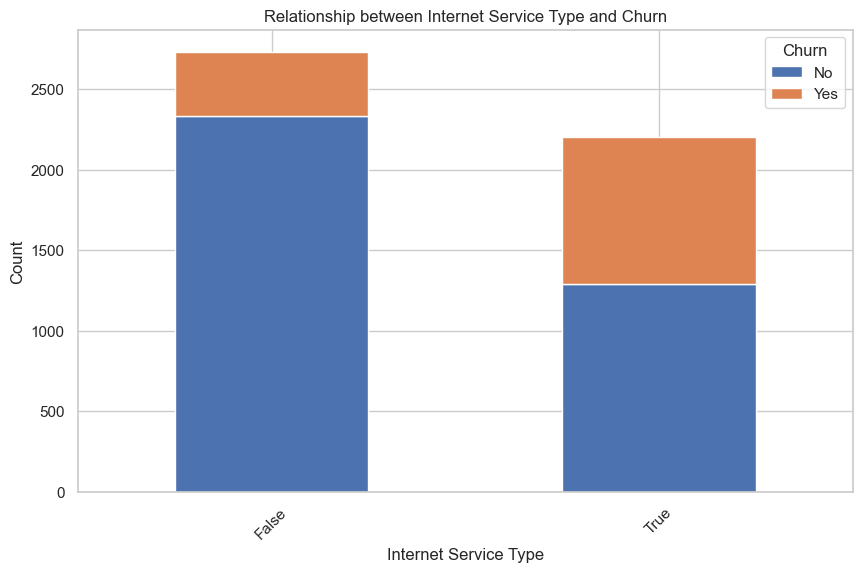

In [54]:
# Create a stacked bar chart to visualize the relationship between 'Internet Service Type' and 'Churn'
# This function generates a stacked bar chart to display the relationship between 'Internet Service Type' and 'Churn' in the 'train' dataset.
create_internet_service_churn_plot(train)

#### Takeaway from stacked bar chart

- From the stacked bar chart above we can observe that customers that have fiber optics as their internet service type tend to churn more than customers that have DSL or none.

### Counplot and stacked bar chart

 #### Is there a correlation between being a senior citizen and the likelihood of churning?  

The two visualizations below presented side by side examines the impact of senior citizens on customer churn. The first plot, a countplot, illustrates the distribution of churn for both senior citizens and non-senior citizens. The second visualization, a pie chart, provides a visual breakdown of churn percentages specifically among senior citizens. These visualizations help us understand the relationship between senior citizenship and customer churn."

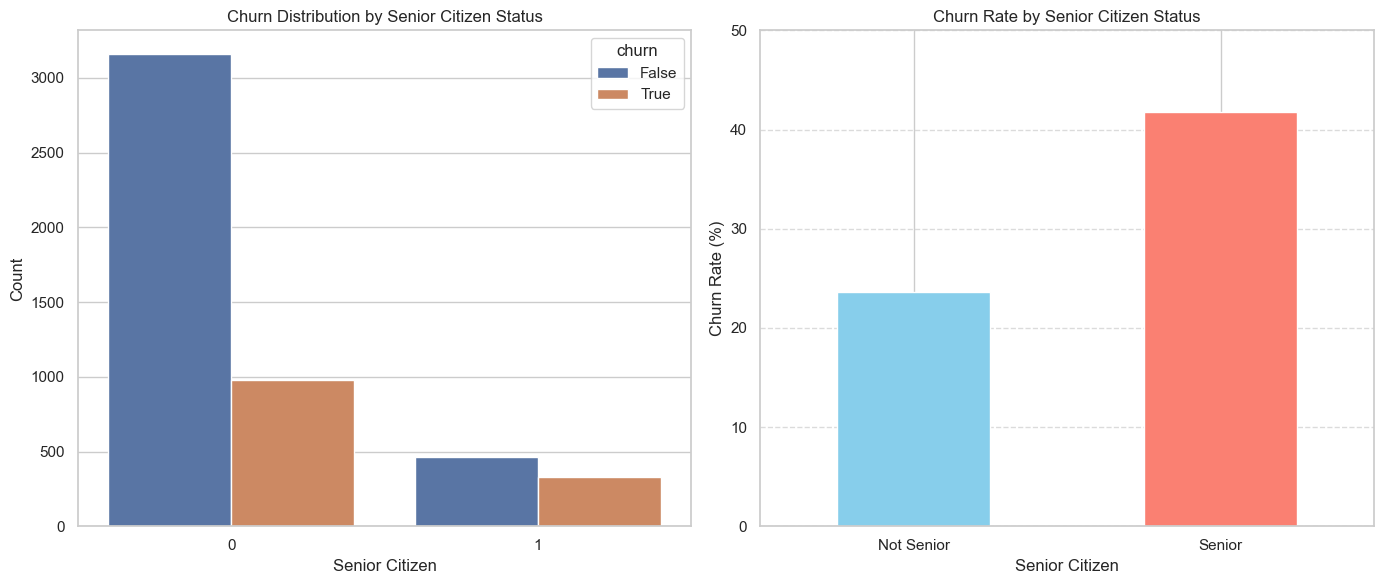

In [42]:
# Create subplots with two plots side by side
# Plot 1: Countplot for Senior Citizens
# Plot 2: Pie Chart for Senior Citizens
create_churn_plots(train)

#### Takeaway from both plots

- From both visualizations, it becomes evident that while senior citizens constitute a relatively small portion of the customer churn, their churn rate is notably higher compared to non-senior citizen customers.

## Exploration Summary

**Tech Support and Churn:**
- The presence of tech support significantly affects churn, as evidenced by a chi-squared test with a p-value much lower than 0.05. Customers without tech support have a nearly 50% churn rate, while those with tech support have a churn rate of less than 15%.

**Tenure and Churn:**
- Tenure has a clear and direct relationship with churn, as demonstrated by an independent t-test with a p-value far below 0.05. The bar plot displaying average tenure for both churn groups reveals that longer-tenured customers are substantially less likely to churn.

**Contract Type and Churn:**
- The chi-squared test, with a p-value of (1.8766652889790652e-184), significantly below our 0.05 cutoff, confirms a strong correlation between contract type and churn. Observations reveal that the presence of tech support affects churn, with nearly half of customers lacking support churning compared to less than 15% with support. Furthermore, a box plot shows that month-to-month contracts significantly increase churn likelihood. This indicates that contract type significantly influences churn, particularly with month-to-month contracts.

**Internet Service Type and Churn:**
- A stacked bar chart visually depicts the relationship between Internet service type and churn. Notably, customers with fiber optic Internet service exhibit a higher churn rate compared to those with DSL or no Internet service. This visual reinforces the significant influence of Internet service type on churn.

**Senior Citizenship and Churn:**
- In the evaluation of senior citizenship's impact on customer churn, two visualizations are juxtaposed. The initial countplot illustrates churn distribution for senior citizens and non-senior citizens. The subsequent pie chart provides a visual breakdown of churn percentages among senior citizens.
- Furthermore, it's apparent from both visualizations that senior citizens, although a minority of customer churn, exhibit a considerably higher churn rate in comparison to non-senior citizen customers.

# Modeling

#### Features for modeling
1. tenure
2. monthly_charges
3. total_charges
4. gender_Male
5. partner
6. dependents
7. phone_service
8. multiple_lines
9. online_security
10. online_backup
11. device_protection
12. tech_support
13. streaming_tv
14. streaming_movies
15. payment_type
16. contract_type
17. internet_service_type
18. paperless_billing
19. senior_citizen

Goal:

- Establish a baseline to judge model efficiency against

- Create multiple models

- Determine the best 3 models to run on my validate dataset

- Assess models created using four distinct model types and a range of hyperparameter settings.

- Models will undergo evaluation on both the training and validation datasets. The top-performing model will subsequently be assessed using the test dataset.

In [43]:
# Encoding categorical columns in the subsets (train, val, test)
train, val, test = encode_columns(train, val, test)

# Splitting the subsets into feature matrices (X) and target vectors (y)
X_train, y_train, X_val, y_val, X_test, y_test = x_y_split(train, val, test)

In [44]:
# Calculate the baseline accuracy by finding the proportion of 'y_train' equal to 0
baseline_accuracy = (y_train == 0).mean()

#### By predicting that no customers will churn, I am accurate 73% of the time. This is the baseline metric that I need to beat for a model to hold any value.

### Model 1 (Decision Tree)

In [45]:
# Train a decision tree classifier using the training data (X_train, y_train) and validate it on the validation data (X_val, y_val)
train_decision_tree(X_train, y_train, X_val, y_val)

Accuracy of Decision Tree on train data is 0.784
Accuracy of Decision Tree on validate data is 0.7955


,Feature,Importance
0,tenure,0.619213
1,monthly_charges,0.337616
2,total_charges,0.043171


#### Takeaways

- By using all the features in my dataset except customer_id, this decision tree model is beating my baseline accuracy of 73%.
- The model is also not overfit because validate is actually performing just slightly better in my model.

### Model 2 (Random Forest)

In [46]:
# Train a random forest classifier using the training data (X_train, y_train) and validate it on the validation data (X_val, y_val)
train_random_forest(X_train, y_train, X_val, y_val)

Accuracy of Random Forest on train data is 0.8152
Accuracy of Random Forest on validate data is 0.7955


,Feature,Importance
1,monthly_charges,0.350272
0,tenure,0.342464
2,total_charges,0.307263


#### Takeaways

- The random forest model performed slightly better than the decision tree model.
- The model is slightly overfit since train does 2% better than the validate subset.

### Model 3 (KNN)

In [47]:
# Train a k-nearest neighbors (KNN) classifier using the training data (train) and validate it on the validation data (val)
train_knn(train, val)

Accuracy of KNN on train data is 0.8039
Accuracy of KNN on validate data is 0.8021


#### Takeaways

- The model performs about equal to the rf model.
- The model doesn't exhibit overfitting, as the margin of difference between the validation and training performance is minimal.

### Model 4 (Logistic Regression)

In [48]:
# Train a logistic regression classifier using the training data (X_train, y_train) and validate it on the validation data (X_val, y_val)
train_logistic_regression(X_train, y_train, X_val, y_val)

Accuracy of Logistic Regression on train data is 0.7862
Accuracy of Logistic Regression on validate data is 0.7983


#### Takeaways

- The model performs about equal to the rf model.
- The model is also not overfit because validate outperforms test.

## Model Comparison

- The four models exhibited similar performance, with the random forest model showing a slight degree of overfitting.
- While the random forest model performed best on the validation data, the KNN model emerged as the top-performing model overall, considering its balanced performance and lack of overfitting.
- I've decided to proceed with the KNN model for further testing.


In [49]:
# Test the k-nearest neighbors (KNN) classifier using the training data (train) on the test data (test)
test_knn(train, test)

Accuracy of KNN on test data is 0.7862


### Create CSV file

In [50]:
# Generate KNN-based churn predictions using the trained model on the test data.
# with KNN parameters (n_neighbors=30) and save predictions to 'knn_churn_predictions.csv'.
generate_knn_predictions(train, test, n_neighbors=30, output_csv_filename='knn_churn_predictions.csv')

# Load the saved predictions CSV file into a DataFrame and print the first five.
pd.read_csv('knn_churn_predictions.csv').head()

,customer_id,probability_of_churn,prediction_of_churn
0,2369-UAPKZ,0.866667,1
1,5380-XPJNZ,0.000000,0
2,1215-VFYVK,0.566667,1
3,4223-BKEOR,0.100000,0
4,7665-NKLAV,0.033333,0


## Modeling Summary

- The four models demonstrated comparable performance, although the random forest model exhibited a minor instance of overfitting.
- Although the KNN model performed about equal on test and validate, it performed slightly worse on test.
- The best performing model (KNN) had an accuracy of 79% which is 6% higher than the baseline accuracy.

# Conclusions

### Key findings

Upon conducting a thorough analysis of the provided data and building predictive models, several critical insights and findings have emerged:

Feature Importance: Our analysis revealed that specific features have a substantial impact on churn prediction. Notably, contract type, tenure, monthly charges, internet service type, and total charges were identified as key determinants of churn.

### Exploration

- Having tech support greatly reducing the customers probability of churning.
- The longer the customer has been with the company the less likely they are to churn.
- New customers tend to have a high churn rate.
- Customers with a monthly plan have a higher churn rate than customers with a yearly plan.
- Customers with DSL tend to have a significantly lower churn rate compared to customers with Fiber optics.
- It is apparent that senior citizens, although a minority of customer churn, exhibit a considerably higher churn rate in comparison to non-senior citizen customers.

### Modeling

- Decision Tree achieved a training accuracy of 78.4% and a validation accuracy of 79.55%. Its top features were tenure (61.92%), monthly charges (33.76%), and total charges (4.32%).
- Random Forest performed well with a training accuracy of 81.52% and a validation accuracy of 79.55%. Its key features were monthly charges (35.03%), tenure (34.25%), and total charges (30.73%).
- KNN exhibited solid performance with a training accuracy of 80.39% and a validation accuracy of 80.21%.
- Logistic Regression achieved an accuracy of 78.62% on training data and 79.83% on validation data.

Overall, Random Forest and KNN show promising results on the validation set, but but KNN slightly outperforms the others on the validate set and is also the least overfitted.

## Recommendations

- Encourage customers to choose longer-term contracts, such as one or two-year contracts, as these seem to have a positive impact on customer retention.
- Consider implementing retention strategies or loyalty programs that reward customers for their longevity with the company.
- Explore options to optimize pricing strategies to make them more competitive in the market without compromising quality.
- Continuously collect feedback from customers who have churned to understand their reasons for leaving. Use this information to make improvements in areas that matter most to customer

### Next Steps

As we move forward, several crucial actions can be taken to refine our churn prediction and mitigation strategies:

- In-Depth Feature Analysis: Conduct comprehensive tests and analyses on all available features to pinpoint the most influential drivers of churn accurately. This will help us focus our efforts on addressing the critical factors.
- Feature Engineering: Experiment with different feature combinations and transformations to potentially enhance model performance. Iteratively building models with various feature sets can reveal valuable insights.
- Data Quality Assurance: Prioritize data preprocessing and cleaning efforts. Scrutinize the data meticulously to minimize the chances of overlooking any errors or inconsistencies that could affect model accuracy.